# PCA Exercises - Food texture data 

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [158]:
df = pd.read_csv('data_sets/food-texture.csv')
df.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


## Preprocessing the data  

In [159]:
df = df.set_index('Unnamed: 0', drop=True)
df.head()

,Oil,Density,Crispy,Fracture,Hardness
Unnamed: 0,,,,,
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


In [160]:
df.describe()

,Oil,Density,Crispy,Fracture,Hardness
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,17.202000,2857.60000,11.520000,20.860000,128.180000
std,1.592007,124.49998,1.775571,5.466073,31.127578
min,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,18.100000,2945.00000,13.000000,25.000000,143.750000
max,21.200000,3125.00000,15.000000,33.000000,192.000000


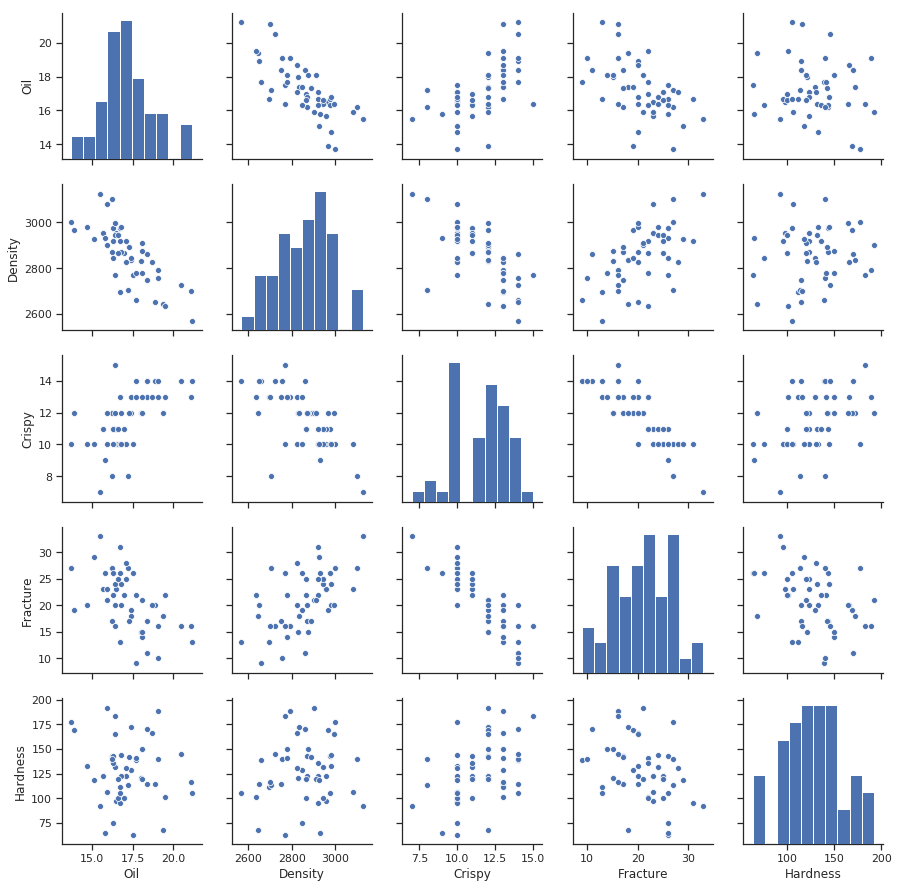

In [163]:
sns.pairplot(df)
plt.show()

In [164]:
df = df.apply(lambda x: x-x.mean())  # centering
df = df.apply(lambda x: x/x.std())  # scaling
df.describe()

,Oil,Density,Crispy,Fracture,Hardness
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.123546e-15,7.235879e-16,2.642331e-16,8.437695e-17,-2.176037e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.199739e+00,-2.310041e+00,-2.545660e+00,-2.169748e+00,-2.093963e+00
25%,-5.665805e-01,-6.835342e-01,-8.560625e-01,-7.061742e-01,-6.723941e-01
50%,-1.896977e-01,7.951809e-02,2.703355e-01,2.561254e-02,-7.003436e-02
75%,5.640679e-01,7.020081e-01,8.335346e-01,7.573993e-01,5.001995e-01
max,2.511296e+00,2.147792e+00,1.959933e+00,2.220973e+00,2.050272e+00


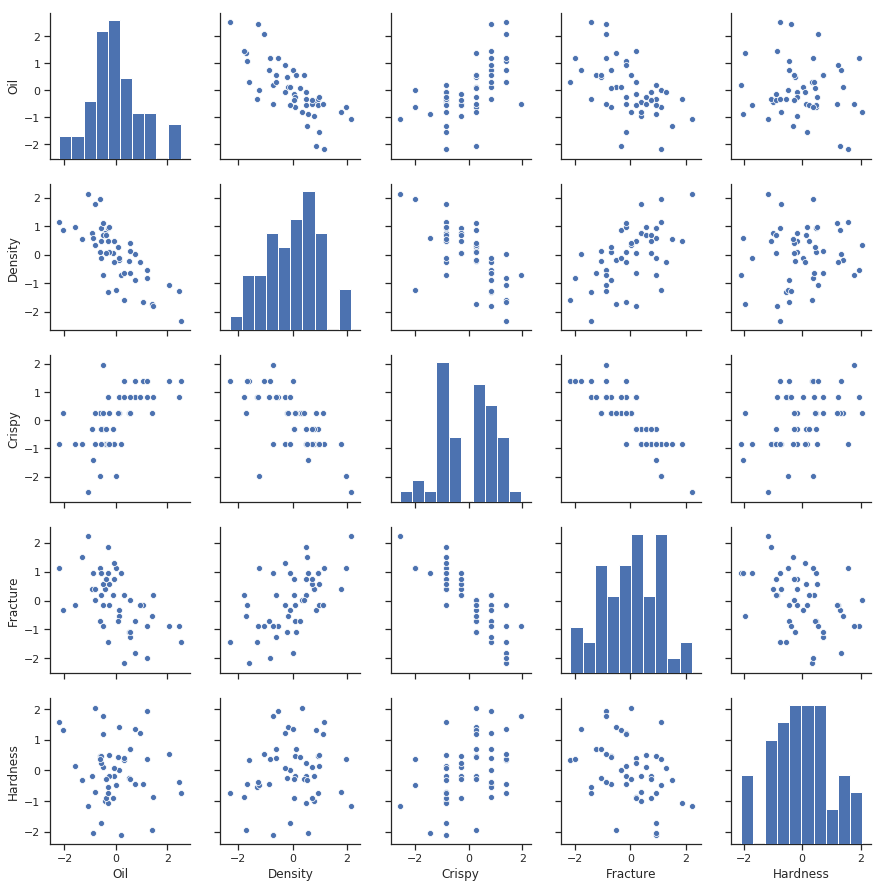

In [166]:
sns.pairplot(df)
plt.show()

## Building the model 


In [167]:
from sklearn.decomposition import PCA
df_array = df.to_numpy()

In [183]:
def PCA_check(arr: np.array, n_components: int) -> None:
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(arr)
    df_principal_components = pd.DataFrame(data = principalComponents)
    df_reconstruction = pca.inverse_transform(df_principal_components)
    mse = ((df_reconstruction - arr) ** 2).mean()
    columns_mse = ((df_reconstruction - df_array) ** 2).mean(axis=0)
    print(f'Componenent number = {n_components}\nReconstruction MSE = {mse}\nColumn MSE = {columns_mse}')
    

In [184]:
n_components = 4
PCA_check(df_array, n_components)

Componenent number = 4
Reconstruction MSE = 0.023737882540984884
Column MSE = [1.72088798e-05 1.50829479e-02 7.45286984e-02 2.29904355e-02
 6.07012197e-03]


In [185]:
n_components = 3
PCA_check(df_array, n_components)

Componenent number = 3
Reconstruction MSE = 0.07115421853491805
Column MSE = [0.05193156 0.13746199 0.07869266 0.0724899  0.01519499]


In [186]:
n_components = 2
PCA_check(df_array, n_components)

Componenent number = 2
Reconstruction MSE = 0.13192388950591066
Column MSE = [0.18389922 0.13754212 0.08841569 0.16184165 0.08792076]


In [188]:
n_components = 1
PCA_check(df_array, n_components)

Componenent number = 1
Reconstruction MSE = 0.3858822192106736
Column MSE = [0.35814631 0.29914919 0.1380263  0.22399427 0.91009503]


### Looking closer to the 3 component PCA

In [172]:
n_components = 3
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(df_array)
df_principal_components = pd.DataFrame(data = principalComponents)
df_reconstruction = pca.inverse_transform(df_principal_components)

In [173]:
display(df.columns)
pca.components_  # principal axes in feature space, size = (n_components, n_features)

Index(['Oil', 'Density', 'Crispy', 'Fracture', 'Hardness'], dtype='object')

array([[-0.45753343,  0.4787455 , -0.53238767,  0.50447688, -0.15340262],
       [ 0.37043885, -0.35674997, -0.19766103,  0.22123992, -0.8046661 ],
       [-0.6590302 , -0.01623973,  0.17888443, -0.54227938, -0.48923298]])

In [174]:
pca.explained_variance_  # The amount of variance explained by each of the selected components.

array([3.03121317, 1.29570576, 0.31004934])

In [175]:
pca.explained_variance_ratio_  # Percentage of variance explained by each of the selected components.

array([0.60624263, 0.25914115, 0.06200987])

In [176]:
pca.singular_values_  # The singular values corresponding to each of the selected components.

array([12.1872657 ,  7.96803504,  3.89774521])